# IoT-ABE Analysis - Secret key length

In [4]:
!python3 -m pip install matplotlib
!python3 -m pip install pandas

     |████████████████████████████████| 15.9MB 6.0MB/s eta 0:00:01
     |████████████████████████████████| 512kB 30.8MB/s eta 0:00:01


In [22]:
%pylab inline

import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=14.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(18.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


/Users/Merryous/go/src/github.com/mariusgiger/iot-abe/analysis/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rc', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
#go test -v github.com/mariusgiger/iot-abe/pkg/crypto -timeout 30s ^TestGenerateSKLength$

In [24]:
import pandas as pd
keylen_df = pd.read_csv("./data/keylen.csv")
keylen_df["keylen"] = keylen_df["keylen"] / 1024

In [25]:
keylen_df.head()

,attr,keylen
0,1,0.401367
1,2,0.669922
2,3,0.938477
3,4,1.207031
4,5,1.475586


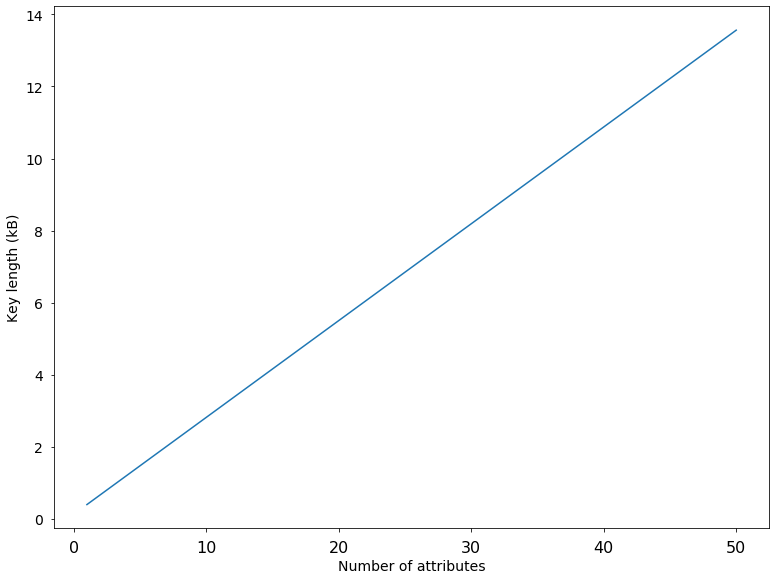

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[12.8, 9.6])

#plt.title('ABE secret key length by number of attributes  (attr length = 10 characters)')
plt.xlabel('Number of attributes')
plt.ylabel('Key length (kB)')

plt.plot(keylen_df["attr"], keylen_df["keylen"])

In [27]:
# go test -run NOTHING -bench=BenchmarkGenerateSK -benchmem github.com/mariusgiger/iot-abe/pkg/crypto

In [28]:
skdur_df = pd.read_csv("./data/benchsklength.csv", sep='\t')
skdur_df.head()

,benchmark,iter,ns/op,B/op,allocs/op
0,BenchmarkGenerateSK/len_1-8,30,40263789 ns/op,632 B/op,12 allocs/op
1,BenchmarkGenerateSK/len_2-8,20,56834593 ns/op,948 B/op,13 allocs/op
2,BenchmarkGenerateSK/len_3-8,20,64274035 ns/op,1272 B/op,14 allocs/op
3,BenchmarkGenerateSK/len_4-8,20,72494347 ns/op,1544 B/op,15 allocs/op
4,BenchmarkGenerateSK/len_5-8,20,85220073 ns/op,1816 B/op,16 allocs/op


In [29]:
skdur_df['ns/op'] = skdur_df['ns/op'].str.replace(' ns/op','')
skdur_df['ns/op'] = pd.to_numeric(skdur_df['ns/op'])
skdur_df['B/op'] = skdur_df['B/op'].str.replace(' B/op','')
skdur_df['B/op'] = pd.to_numeric(skdur_df['B/op'])
skdur_df['allocs/op'] = skdur_df['allocs/op'].str.replace(' allocs/op','')
skdur_df['allocs/op'] = pd.to_numeric(skdur_df['allocs/op'])

skdur_df['ms/op'] = skdur_df['ns/op'] / 1e6

skdur_df['attr'] = pd.Series(range(1,51))
skdur_df.head()

,benchmark,iter,ns/op,B/op,allocs/op,ms/op,attr
0,BenchmarkGenerateSK/len_1-8,30,40263789,632,12,40.263789,1
1,BenchmarkGenerateSK/len_2-8,20,56834593,948,13,56.834593,2
2,BenchmarkGenerateSK/len_3-8,20,64274035,1272,14,64.274035,3
3,BenchmarkGenerateSK/len_4-8,20,72494347,1544,15,72.494347,4
4,BenchmarkGenerateSK/len_5-8,20,85220073,1816,16,85.220073,5


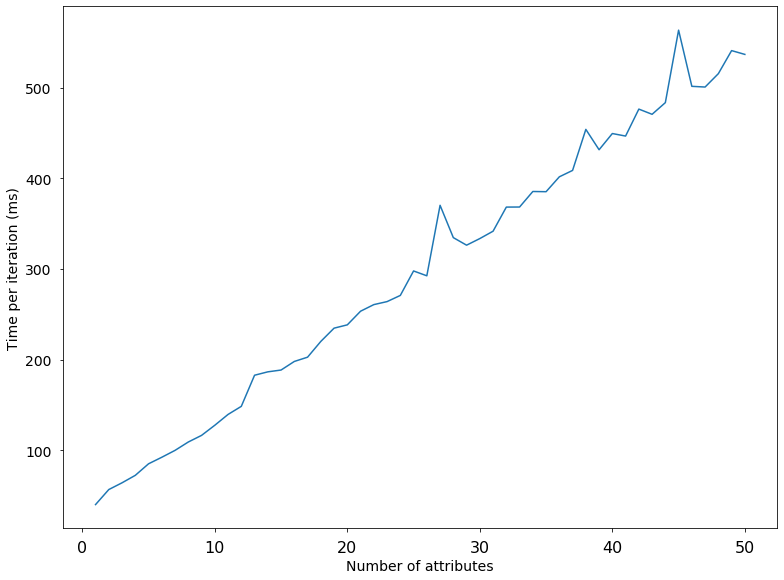

In [31]:
fig, ax = plt.subplots(figsize=[12.8, 9.6])

#plt.title('ABE secret key length by number of attributes  (attr length = 10 characters)')
plt.xlabel('Number of attributes')
plt.ylabel('Time per iteration (ms)')

plt.plot(skdur_df["attr"], skdur_df["ms/op"])

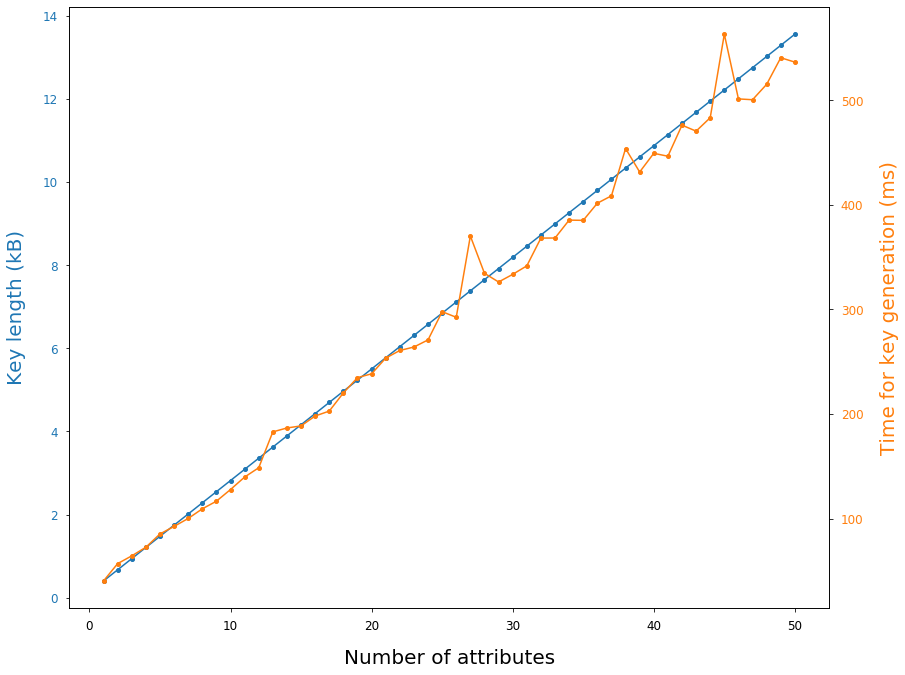

In [46]:
fig, ax1 = plt.subplots(figsize=[12.8, 9.6])


color = 'tab:blue'
ax1.set_xlabel('Number of attributes', fontsize=20, labelpad=16)
ax1.set_ylabel('Key length (kB)', color=color, fontsize=20, labelpad=16)
ax1.plot(keylen_df["attr"], keylen_df["keylen"], marker='o', markersize=4)
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Time for key generation (ms)', color=color, fontsize=20,  labelpad=16)
ax2.plot(skdur_df["attr"], skdur_df["ms/op"], color=color, marker='o', markersize=4)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

fig.tight_layout()  

Links:
- http://codingberg.com/golang/interview/compute_parity_of_64_bit_unsigned_integer